In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Literal, Annotated
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

True

In [2]:
model = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [3]:
class JokeState(TypedDict):
    joke: str
    topic: str
    explanation: str

In [6]:
def generate_joke(state: JokeState) -> str:

    prompt = f"Generate a joke about {state['topic']}."
    response = model.invoke(prompt).content
    return {"joke": response}

In [7]:
def generate_explanation(state: JokeState) -> str:

    prompt = f"Explain the joke: {state['joke']}."
    response = model.invoke(prompt).content
    return {"explanation": response}

In [13]:
graph = StateGraph(JokeState) 

graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)

checkpoint = InMemorySaver()

workflow = graph.compile(checkpointer=checkpoint)
    

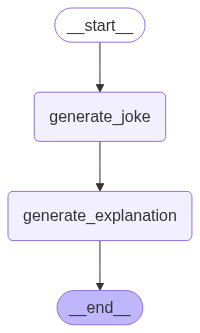

In [14]:
workflow

In [15]:
# Execute the workflow with an initial state

initial_state = {
    'topic': 'Indian Army'}

config = {"configurable": {"thread_id":"1"}}
workflow.invoke(initial_state, config=config)

{'joke': '<think>\nOkay, so I need to generate a joke about the Indian Army. Hmm, let me think about this. I should make sure the joke is respectful and not offensive, as the army is a respected institution. Maybe I can play on words related to their roles or something they\'re known for. \n\nI know the Indian Army has a strong presence in the Himalayas, so maybe something about the cold or the mountains. Or perhaps something about their training or daily life. Let me think of some common phrases or sayings that can be twisted into a joke.\n\nWait, I remember hearing jokes that involve animals, like elephants, because they\'re large and can be funny. Maybe an elephant joining the army? That could be a funny premise. So, why did the elephant join the Indian Army? Hmm, maybe because it\'s strong or has good memory, but those are too straightforward.\n\nI want a pun or a play on words. Let me think about army ranks or something related. Oh, maybe the elephant wanted a higher position, so 

In [17]:
workflow.get_state(config)

StateSnapshot(values={'joke': '<think>\nOkay, so I need to generate a joke about the Indian Army. Hmm, let me think about this. I should make sure the joke is respectful and not offensive, as the army is a respected institution. Maybe I can play on words related to their roles or something they\'re known for. \n\nI know the Indian Army has a strong presence in the Himalayas, so maybe something about the cold or the mountains. Or perhaps something about their training or daily life. Let me think of some common phrases or sayings that can be twisted into a joke.\n\nWait, I remember hearing jokes that involve animals, like elephants, because they\'re large and can be funny. Maybe an elephant joining the army? That could be a funny premise. So, why did the elephant join the Indian Army? Hmm, maybe because it\'s strong or has good memory, but those are too straightforward.\n\nI want a pun or a play on words. Let me think about army ranks or something related. Oh, maybe the elephant wanted a

In [18]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'joke': '<think>\nOkay, so I need to generate a joke about the Indian Army. Hmm, let me think about this. I should make sure the joke is respectful and not offensive, as the army is a respected institution. Maybe I can play on words related to their roles or something they\'re known for. \n\nI know the Indian Army has a strong presence in the Himalayas, so maybe something about the cold or the mountains. Or perhaps something about their training or daily life. Let me think of some common phrases or sayings that can be twisted into a joke.\n\nWait, I remember hearing jokes that involve animals, like elephants, because they\'re large and can be funny. Maybe an elephant joining the army? That could be a funny premise. So, why did the elephant join the Indian Army? Hmm, maybe because it\'s strong or has good memory, but those are too straightforward.\n\nI want a pun or a play on words. Let me think about army ranks or something related. Oh, maybe the elephant wanted 

In [19]:
initial_state = {
    'topic': 'Pasta'}

config1 = {"configurable": {"thread_id":"2"}}
workflow.invoke(initial_state, config=config1)

{'joke': '<think>\nOkay, the user has asked me to generate a joke about pasta. Hmm, pasta is a broad topic, so I need to think of something relatable. Maybe something about different types of pasta or common situations people have with pasta. Spaghetti comes to mind because it\'s long and slippery, which could lead to a funny situation. \n\nI remember that when you eat spaghetti, especially with sauce, it can be messy. Maybe I can play on the idea of the spaghetti moving or causing trouble. Oh, why was the spaghetti refused entry to the party? Because it was too saucy! That works because "saucy" has a double meaning here—it refers to the sauce on the pasta and also being a bit cheeky or mischievous, which is a playful reason to not let someone into a party. \n\nI think this joke is simple and gets the point across. It\'s light-hearted and suitable for most audiences. Plus, it\'s easy to remember, which is a good trait for a joke. I should present it clearly so the user can easily share